# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [7]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=3))

unique_data = data['race'].unique()
unique_data

#data_with_duplicates_removed = data.drop_duplicates(subset=data['race'], keep='first', inplace=False)
#display(unique_data)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K


array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [8]:
# TODO: Total number of records
n_records = data['income'].count()

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = list(data['income']).count('>50K')

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = list(data['income']).count('<=50K')

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = list(data['income']).count('>50K')/float(len(list(data['income']))) * 100

# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

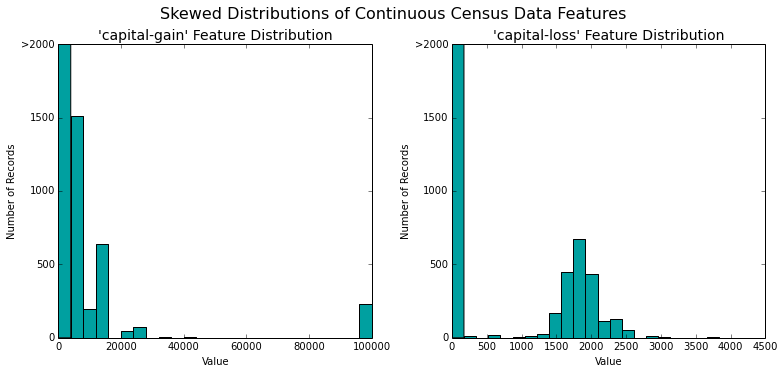

In [9]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

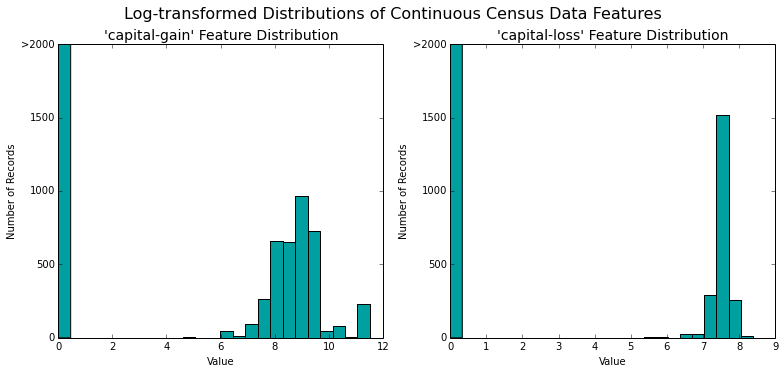

In [10]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [11]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_raw'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [12]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
income = [1 if x == '>50K' else 0 for x in income_raw]

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# Uncomment the following line to see the encoded feature names
# print encoded

103 total features after one-hot encoding.


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [13]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [14]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''

TP = np.sum(income)
FP = income.count(0)
TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# TODO: Calculate accuracy, precision and recall
accuracy = TP/float(len(income))
recall = TP/float(TP+FN)
precision = TP/float(TP+FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
# HINT: The formula above can be written as (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)
beta = 0.5
fscore = (1 + beta**2) * (precision * recall) / float((beta**2 * precision) + recall)

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}, Recall: {:.4f}, Precision: {:.4f}]".format(accuracy, fscore, recall, precision)

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917, Recall: 1.0000, Precision: 0.2478]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

**Answer: **

**Gaussian Naive Bayes (GaussianNB):**

*Real World Application: *
Naive Bayes classifiers are used in text classification. Two of the real world applications of Naive Bayes classifiers is the spam detection and image classification. Naive bayes classification algorithm is also optimized to enable it to provide a good model for face detection[3].

*Strengths:*
Features are considered independent of each other. 
It is a simplistic but effective classifier and can suit well for the charityML than the algorithms that require more computational power for processing huge data set.
Training and prediction speed is effective.
All the probabiliies of the data given the hypothesis is already precalculated. So, it just needs to plug in values to calculate the probability of hypothesis given data.
Best suited for classification (binary or multi-class classifications).

*Weakness:*
It assumes features to be independent of each other. This is in contrast to the real world scenario.
But surprisingly, the classifier seems to work best even in that scenario as more often the influence is not seemed to affect the probabilities severely[4]. 
The model must be trained as we have new features as the probability of the class given an unseen feature will always be zero unless it is trained.

*Reason for Selection:*
Training and Prediction speed is very good and uses less computational power. Naive Bayes is preferred when the dimentionality of the data is high [7].  For a charity project, they may not want to spend on expensive high power computational equipments and hence competitive accuracy with Naive Bayes can be the best bet.

**Support Vector Machines (SVM):**

*Real World Application: *
SVM is used in face detection to identify the parts of the face and determine if it is face or non-face. It has widespread use in bioinformatics in protein classification and cancer classification. SVM helps in Handwriting recognition as well[7]. 

*Strengths:*
It can handle large feature space and can handle non-linear feature interaction.
It relies on the boundary points to make decisions and does not rely on the entire data. So, it can handle missing data pretty well. It is not affected much by noise and outliers.
There are quite a few parameters to tune to reach the optimum model.

*Weakness:*
Poor choice of kernel and regularization hyper-parameters coupled with huge data can severly degrade the performance of SVM. It would be tricky to find appropriate kernel as it may need lot of trial and error. It will take long time when the number of samples grow and will take high computational power.

*Reason for Selection:*
The problem here is the binary classification problem and considering we have quite a number of features, SVM can help to segregate the feature space in a better way and has proven to be effective in most cases. SVM indeed uses lot of computation power and time for training and prediction. This model can be an effective solution if occassional usage of time and resources is not a limiting factor.


**K-Nearest Neighbors (KNeighbors):**

*Real World Application: *
KNN is heavily used in text mining and document classification. It is also used in finance industry for stock market forecasting for uncovering trends [9]. KNN has applications in medical industry to determine the risk of patient acquiring the disease based on the demographic and clinical measurements.


*Strengths:*
Simple but effective algorithm. Primarily used for classification problems but can be used for regression problems as well. The intuition of this algorithm concept makes more sense as the neighbourgood class majority have high probability of determining the class of the new data point around that area. It can work effectively on the large data set.

*Weakness:*
Computation cost is higher as every data point needs to be checked for its neighbours and the majority vote has to be taken. As the data points grow large, the computation cost increases as well and the time taken for training will increase accordingly. We need to use proper distance metric to compute the closest neighbours. We need to make sure that the K value is reasonably large so that it does not overfit or underfit. This can be found only through multiple iterations of K. Curse of Dimensionality - If the number of dimensions increases, then we need exponential increase in data as the nearest neighbour will be far distant in higher dimensional space.

*Reason for Selection:*
For charityML, there will be certain features that can influence the income level more than the others. The characteristics of these features can help us classifying the new observation as the observations that are similar tend to closer in distance. Also, the training time for KNN is very low as it is instance based learning. The prediction time will be comparatively higher but it should not be too long considering the dataset is not huge.


Considering the above, I am going ahead with Gaussian NB, Support Vector Machines and K Nearest Neighbours.

References:

1. https://www.analyticsvidhya.com/blog/2014/10/introduction-k-neighbours-algorithm-clustering/
2. http://www.lsi.upc.edu/~bejar/apren/docum/trans/03d-algind-knn-eng.pdf
3. https://link.springer.com/chapter/10.1007/978-981-10-5230-9_14
4. http://www.datasciencecentral.com/profiles/blogs/want-to-know-how-to-choose-machine-learning-algorithm
5. http://www.cs.cmu.edu/~tom/10601_sp09/lectures/NBayes2_2-2-2009-ann.pdf
6. http://www.cs.cornell.edu/~caruana/ctp/ct.papers/caruana.icml06.pdf
7. http://www.datasciencecentral.com/profiles/blogs/real-life-applications-of-support-vector-machines
8. https://www.ijsr.net/archive/v5i1/NOV153131.pdf
9. http://www.ijera.com/papers/Vol3_issue5/DI35605610.pdf

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [3]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
import time
from sklearn.metrics import fbeta_score, accuracy_score


def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    print time.time()
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time.time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time.time() # Get end time
    TrainingDuration = end - start
    
    print(TrainingDuration)
    
    # TODO: Calculate the training time
    results['train_time'] = end - start#time.strftime("%H:%M:%S", time.gmtime(TrainingDuration))
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time.time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time.time() # Get end time
    PredictionDuration = end - start
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start #time.strftime("%H:%M:%S", time.gmtime(PredictionDuration))
    
    
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    y_train_300 = y_train[:300] # It will contain the actual predictions of first 300 samples
#     print(y_train_300)
#     check_correct_pred = [y_train_300[x] == predictions_train[x] for x in range(sample_size)]
#     no_of_correct_pred = check_correct_pred.count(True)
#     results['acc_train_manual'] = no_of_correct_pred/sample_size
    results['acc_train'] = accuracy_score(y_train_300, predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train_300, predictions_train, beta=0.5) # tending towards precision because we are okay
    #false positives in this case but cant afford to lose a potential donor.
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
#     print(results)
    
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

1506123205.96
0.0066351890564
GaussianNB trained on 361 samples.
1506123206.03
0.0287759304047
GaussianNB trained on 3617 samples.
1506123206.13
0.315527915955
GaussianNB trained on 36177 samples.
1506123206.69
0.0644991397858


/Library/Python/2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC trained on 361 samples.
1506123207.08
1.31328296661
SVC trained on 3617 samples.
1506123211.5
103.205174923
SVC trained on 36177 samples.
1506123405.65
0.0695521831512
KNeighborsClassifier trained on 361 samples.
1506123406.21
0.0184631347656
KNeighborsClassifier trained on 3617 samples.
1506123411.35
1.93296003342
KNeighborsClassifier trained on 36177 samples.
{'GaussianNB': {0: {'pred_time': 0.048388004302978516, 'f_test': 0.31013434666826251, 'train_time': 0.006635189056396484, 'acc_train': 0.38781163434903049, 'acc_test': 0.35179657269209508, 'f_train': 0.32208588957055218}, 1: {'pred_time': 0.05342721939086914, 'f_test': 0.32025811848355396, 'train_time': 0.028775930404663086, 'acc_train': 0.36079623997788224, 'acc_test': 0.3660585959093422, 'f_train': 0.31580122005653921}, 2: {'pred_time': 0.1895921230316162, 'f_test': 0.42089895957560558, 'train_time': 0.31552791595458984, 'acc_train': 0.5973408519224922, 'acc_test': 0.59767827529021555, 'f_train': 0.42537321058170774}}, 'SV

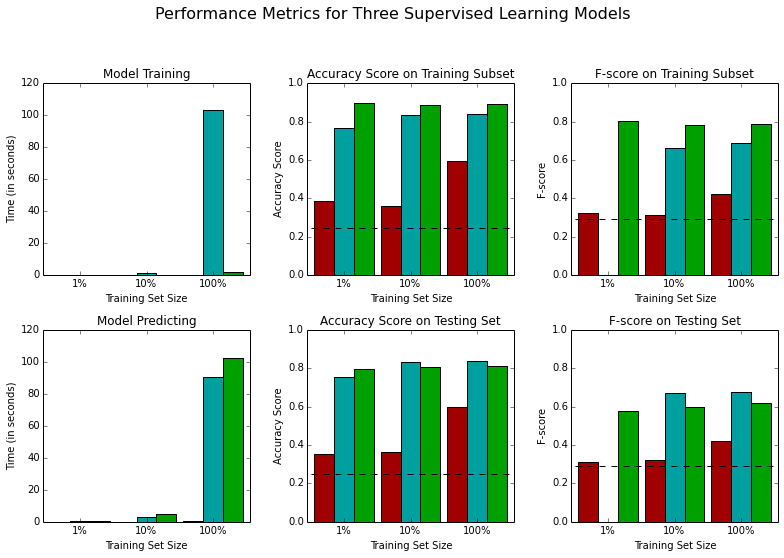

In [16]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

# TODO: Initialize the three models
clf_A = GaussianNB()
clf_B = svm.SVC(random_state=22)
clf_C = KNeighborsClassifier(n_neighbors=3)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100
samples_100 = len(y_train)
samples_10 = int(0.10 * samples_100)
samples_1 = int(0.01 * samples_100)


# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

print(results)    
# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore) 



----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 




### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer: **

The Gaussian NB, SVM Classifier and K Nearest Neighbour algorithms were taken for consideration. Out of the 3, SVC and K Nearest Neighbours algorithms performed well. 

Metrics:

K Nearest Neighbours algorithms performed well on the training set with the accuracy hitting 89% and the F-train is 78.87%. SVC was relatively being less accurate in the prediction of labels in the training set with hitting the accuracy of 83% and f-train of 68.76%

But when it comes to testing the unknown dataset, SVC has surpassed KNN with the accuracy of 83.71% and f beta score of 67.44%. For KNN, the accuracy and f beta score are 81.48% and 61.99%. 

Prediction/Training Time:

Considering the whole dataset, it took 112 seconds for SVC to be trained for this data volume. Whereas KNN took just 2 seconds for training. But the prediciton time taken by SVC is 94 seconds when compared to KNN that took 114 seconds. Most importantly SVC was able to provide a better model in comparatively lesser time.

Algorithm's suitability of data:

SVC is a binary classifier and the problem at hand is a binary classification problem. We are interested in finding out whether the income of an individual is greater or lesser than 50k. We do have lot of features involved and SVC, eventhough it takes time to train/predict, considering the accuracy that it yields, will be the best bet.




### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.


**Answer: ** 

Support Vector Machines, or simply SVM, is a supervised machine learning algorithm. By supervised it means that the algorithm can be trained on a set of data points with the associated classification label (i.e., whether the observation belongs to class A or class B ). Later, the model can be used to predict the class of the new observation based on the training performed earlier. On a high level, what this model does is to identify a line on a two dimensional space that can segregate the data points into two different classes. The diagrams provided in the in the below cells illustrate the same.

As shown in the diagram that follows this cell, each data point is plotted in the n-dimensional space ( here we have only 2 dimensions ). The model is fed with these data points to come up with a line that separates both the classes  - green and red points. To arrive at a line that comprehensively separates the two classes, the model uses the data points that are closer to the line and these are called support vectors (marked in the diagram below). The line that separates the two classes will aim to maximize the distance between the support vectors and the line.

In the ideal world, there will not be clear noticeable segregation between classes most of the time. There will always be noise and the model has to deal with this. Noise in the observations are the data points that are present in incorrect classes. If we take the same example below in the second diagram, we have one misclassified blue point in red area. 

Support vectors are highly robust against outliers (like the one mentioned above). It has option to ignore outliers while it tries to maximize the margin. During training, the SVM algorithm learns from the data points and corrects itself to establish the best margin that can classify both the classes.In real world, as mentioned above the classes are not so easily separable. This model has tuning parameters to tune so that the best model with reasonable accuracy can be achieved. The training of model takes a lot of time and grows significantly with the number of observations and features.

SVMs have proven to be very effective in lot of real world classification problems like face recognition, stock market analysis etc., From the charityML perspective, this would server their puprose of identifying potential donors more accurately so that they have higher chance of getting donation.

References:
https://www.quora.com/What-are-industry-applications-of-the-K-nearest-neighbor-algorithm
https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_1.png
https://machinelearningmastery.com/support-vector-machines-for-machine-learning/

In [6]:
from IPython.display import Image
from IPython.core.display import HTML, display 
display(Image(url= "https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_1.png"))
display(Image(url= "https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_61.png"))


### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [19]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score

# TODO: Initialize the classifier
clf = svm.SVC(random_state=22)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'C':range(1,5),'kernel':['linear','poly','rbf','sigmoid'],'degree':range(1,5)}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta = 0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

Unoptimized model
------
Accuracy score on testing data: 0.8371
F-score on testing data: 0.6745

Optimized Model
------
Final accuracy score on the testing data: 0.8395
Final F-score on the testing data: 0.6809


In [20]:
print(best_clf)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=22, shrinking=True,
  tol=0.001, verbose=False)


### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| Accuracy Score |       0.2478        |    0.8371         |   0.8395        |
| F-score        |       0.2917        |    0.6745         |   0.6809        |


**Answer: **

The optimized model has the accuracy of 83.95%, which is slight improvement compared to the unoptimized model. The F-score of optimized model has improved nearly by 1% as well.

The scores are definitely better than unoptimized model.

The scores are way better than the Naive Predictor. As described in the table above, the naive predictor has an accuracy of 24 %  whereas the optimized model has the accuracy of close to 84%. There is significant improvement in terms of F-score as well. So, the optimized model has definitely provided better results than both the naive and unoptimized models.



----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**


1. Occupation: Income is directly related to the type of occupation and it certainly will have the strongest influence among other features.

2. Education-num: Highly educated individuals more often than not will earn more and hence it can be of strong influence.

3. Capital-gain: Higher the capital gain can affect the income in positive way.

4. Work Class: Depending on the work class, the income may vary and hence can have influence.

5. Age: As the age increases, people tend to be more experience and hence will earn more.


### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

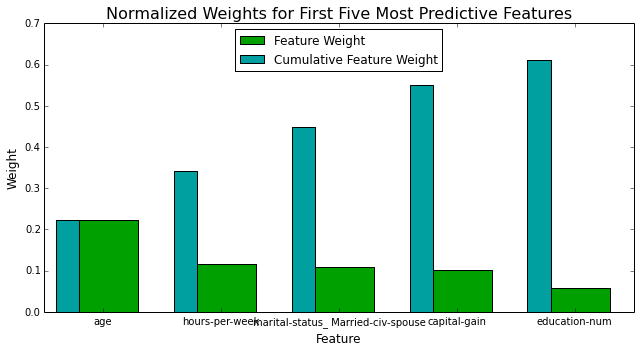

In [21]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import RandomForestClassifier


# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**

The important features listed by the RandomForestClassifier is majorly surprising in terms of occupation. The occupation was not even in the list of top 5 features whereas I classified as the top most. This shows the data is very diverse and we have mixed dataset where the occupation do not have any direct influence in predicting the income.

The answers listed by the classifier includes age, capital-gain and education-num. I listed age as rank 5 whereas it was having the greatest influence in pedicting income according to the model. I selected work-class but as per the model it is not one of the top most influencers.

It makes sense to think the more number of hours a person works, the more his/her income would be. So, it is quite understandable that hours-per-week is one of the influencers. Having said that this depends on the data set. Because, the labors who are working more hours per week may not match the salaries of executives who are working standard hours per week. One surprise from the above was the relation between the marital status and income. This needs to be examined more carefully as it can either be meaninful or it can be due to mere coincidence in the dataset.


### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [22]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))

Final Model trained on full data
------
Accuracy on testing data: 0.8395
F-score on testing data: 0.6809

Final Model trained on reduced data
------
Accuracy on testing data: 0.8282
F-score on testing data: 0.6521


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**

The final model's accuracy and f-score on reduced data were pretty close to the model with all the features. The model on the reduced features provided accuracy of 82.82%  and f-score of 65.21%. Accuracy has decreased by 1% and F-score has decreased by nearly 3% in the model on reduced data.

If training time was the factor, it is cent percent worthwhile to go with the model on reduced features. The training and testing of model on reduced features took less than a minute whereas the model with all the features took more than 6 hours to provide results.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.